<a href="https://colab.research.google.com/github/Mosaddeq/Sentiment-Analysis/blob/master/Thesis_update_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
%matplotlib inline
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import plot_confusion_matrix


from google.colab import drive
drive.mount('/content/drive',force_remount=True)
data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Thesis Data test.csv', encoding='utf8')

Mounted at /content/drive


In [81]:
data['Sentence'] = data['Sentence'].str.lower()

In [70]:
words=[]
i=0
for lines in data:
    if lines[0] !=';' and lines[0] != '\n':
        words.append(lines.strip())


In [82]:
vect=CountVectorizer() ##Convert a collection of text documents to a matrix of token counts
vect.fit(data['Sentence']) #creates dict. by series of tokens

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [83]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 1264
Vocabulary content:
 {'it': 627, 'good': 501, 'teachers': 1107, 'can': 157, 'judge': 634, 'us': 1195, 'properly': 899, 'through': 1146, 'this': 1142, 'system': 1088, 'the': 1124, 'focus': 455, 'on': 776, 'outcomes': 802, 'creates': 235, 'clear': 184, 'expectation': 406, 'of': 771, 'what': 1225, 'needs': 751, 'to': 1151, 'be': 121, 'accomplished': 11, 'by': 154, 'end': 348, 'course': 229, 'not': 758, 'curriculum': 248, 'is': 623, 'really': 930, 'quiet': 916, 'outcome': 801, 'based': 114, 'education': 325, 'teaches': 1108, 'thinking': 1140, 'skills': 1022, 'and': 58, 'engages': 353, 'students': 1067, 'more': 734, 'when': 1227, 'student': 1066, 'product': 882, 'in': 577, 'much': 740, 'meaningful': 710, 'than': 1121, 'answers': 62, 'test': 1118, 'provides': 906, 'learning': 659, 'similar': 1013, 'real': 927, 'world': 1253, 'applications': 67, 'with': 1243, 'sense': 990, 'instructors': 607, 'will': 1238, 'able': 5, 'structure': 1063, 'their': 1125, 'lessons': 666, 'aro

In [84]:
bag_of_words=vect.transform(words)


In [85]:
print(bag_of_words)



In [86]:
print("bag_of_worda as array:\n{}".format(bag_of_words.toarray()))

bag_of_worda as array:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [87]:
vect.get_feature_names()

['01st',
 '10',
 '15',
 'abilities',
 'ability',
 'able',
 'about',
 'abroad',
 'absorb',
 'academic',
 'accept',
 'accomplished',
 'accountability',
 'accreditation',
 'achieve',
 'achieved',
 'achievement',
 'achieving',
 'achive',
 'acquired',
 'actual',
 'actually',
 'adapts',
 'add',
 'added',
 'adding',
 'addition',
 'addressing',
 'administrative',
 'administrators',
 'admiring',
 'adopt',
 'adopted',
 'adoption',
 'adopts',
 'advance',
 'advantage',
 'advantages',
 'afraid',
 'after',
 'again',
 'age',
 'agree',
 'aimed',
 'all',
 'allow',
 'allows',
 'along',
 'already',
 'alright',
 'also',
 'always',
 'am',
 'amazing',
 'among',
 'an',
 'analysis',
 'analyze',
 'and',
 'another',
 'answer',
 'answering',
 'answers',
 'any',
 'anything',
 'appeal',
 'application',
 'applications',
 'applied',
 'applies',
 'apply',
 'applying',
 'appreciate',
 'approach',
 'approaches',
 'appropriate',
 'approval',
 'are',
 'argued',
 'around',
 'arranging',
 'articulate',
 'as',
 'aspects',
 

In [34]:
data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Thesis Data test.csv')

In [88]:
data.head()

,Sentence,sentiment
0,it's good.,1
1,teachers can judge us properly through this sy...,1
2,the focus on outcomes creates a clear expectat...,0
3,not a good curriculum.,0
4,this system is really good.,1


In [89]:
X = data['Sentence']
y= data['sentiment']

In [90]:
print(y.shape)
print(X.shape)

(596,)
(596,)


In [91]:
vectorizer = CountVectorizer()


In [92]:
X_train,X_test,y_train, y_test = train_test_split( X, y, test_size = 0.2)


In [93]:
len(X_train)

476

In [94]:
print("sample class: {}".format(np.bincount(y_train)))
print("sample class: {}".format(np.bincount(y_test)))

sample class: [200 276]
sample class: [43 77]


In [95]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [96]:
feature_names = vectorizer.get_feature_names()
print("number of features: {}".format(len(feature_names)))

number of features: 1137


In [97]:
scores = cross_val_score(LogisticRegression(), X_train,y_train, cv=5)
print("Mean Cross Validation Accuracy: {:.2f}".format(np.mean(scores)) )

Mean Cross Validation Accuracy: 0.70


In [98]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
print("train Score: {:.3f}".format(logreg.score(X_train,y_train)))
print("test Score: {:.3f}".format(logreg.score(X_test,y_test)))

train Score: 0.971
test Score: 0.775


In [99]:
pred_logreg  = logreg.predict(X_test)
confusion = confusion_matrix(y_test,pred_logreg)
print("cofusion Matrix:\n{}" .format(confusion))

cofusion Matrix:
[[29 14]
 [13 64]]


In [100]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
print("Training set score: {:.3f}".format(nb.score(X_train,y_train)))
print("Test set score: {:.3f}".format(nb.score(X_test,y_test)))

Training set score: 0.924
Test set score: 0.825


In [101]:
pred_nb  = nb.predict(X_test)
confusion1 = confusion_matrix(y_test,pred_nb)
print("cofusion Matrix:\n{}" .format(confusion1)) 

cofusion Matrix:
[[32 11]
 [10 67]]


In [102]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("Training set score: {:.3f}".format(rf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test,y_test)))

Training set score: 0.983
Test set score: 0.767


In [103]:
pred_rf  = rf.predict(X_test)
confusion2 = confusion_matrix(y_test,pred_rf)
print("cofusion Matrix:\n{}" .format(confusion2))

cofusion Matrix:
[[26 17]
 [11 66]]


In [104]:
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X_train,y_train)
knn_prediction = knn_clf.predict(X_test)
print("Training set score: {:.3f}".format(knn_clf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(knn_clf.score(X_test,y_test)))


Training set score: 0.683
Test set score: 0.642


In [105]:
confusion3 = confusion_matrix(y_test,knn_prediction)
print("cofusion Matrix:\n{}" .format(confusion3))

cofusion Matrix:
[[24 19]
 [24 53]]


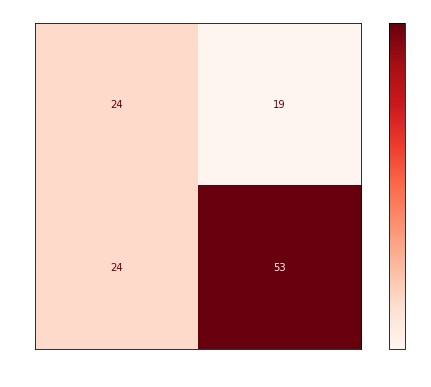

In [106]:
matrix = plot_confusion_matrix(knn_clf, X_test, y_test,cmap = plt.cm.Reds)
matrix.ax_.set_title('confuison Matrix' , color='white')
plt.xlabel('Predicted Label',color='white')
plt.ylabel('True Label', color='white')                             #plot confusion matrix
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()


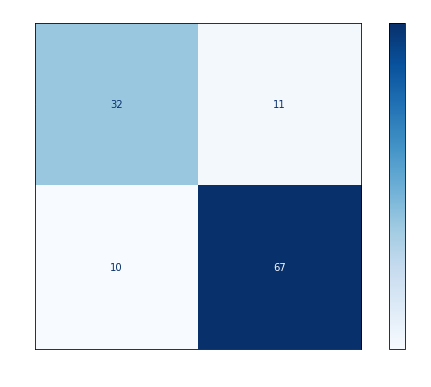

In [107]:
matrix = plot_confusion_matrix(nb, X_test, y_test,cmap = plt.cm.Blues)
matrix.ax_.set_title('confuison Matrix' , color='white')
plt.xlabel('Predicted Label',color='white')
plt.ylabel('True Label', color='white')                         #plot confusion matrix
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()

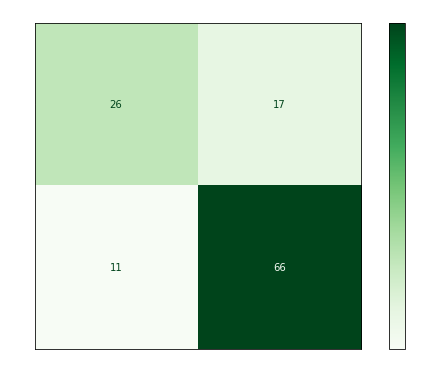

In [108]:
matrix = plot_confusion_matrix(rf, X_test, y_test,cmap = plt.cm.Greens)
matrix.ax_.set_title('confuison Matrix' , color='white')
plt.xlabel('Predicted Label',color='white')
plt.ylabel('True Label', color='white')                       #plot confusion matrix
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()

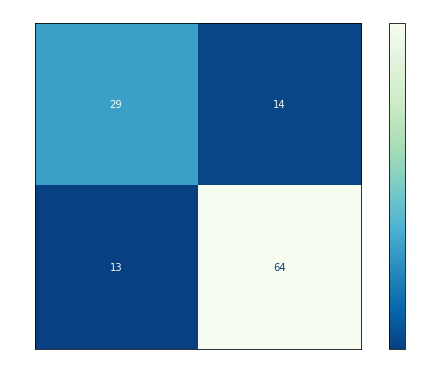

In [109]:
matrix = plot_confusion_matrix(logreg, X_test, y_test,cmap = plt.cm.GnBu_r) #plot confusion matrix
matrix.ax_.set_title('confuison Matrix' , color='white')
plt.xlabel('Predicted Label',color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [110]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test) #calculating probabilities
nb_probs = nb.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
knn_clf_probs = knn_clf.predict_proba(X_test)

In [111]:
rf_probs = rf_probs[:, 1] ##probabilitions for the pos outcomes is kept
nb_probs= nb_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
knn_clf_probs=knn_clf_probs[:, 1]

In [112]:
from sklearn.metrics import roc_curve , roc_auc_score

In [113]:
r_auc = roc_auc_score(y_test,r_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
nb_auc = roc_auc_score(y_test,nb_probs)             #calculating roc_auc
logreg_auc =roc_auc_score(y_test,logreg_probs)
knn_clf_auc =roc_auc_score(y_test,knn_clf_probs)

In [114]:
print('random (chance) = %.3f'% (r_auc))
print('random forest = %.3f'% (rf_auc))
print('naive bayes = %.3f'% (nb_auc))
print('logistic regression = %.3f'% (logreg_auc))
print('KNN-classifier = %.3f'% (knn_clf_auc))

random (chance) = 0.500
random forest = 0.817
naive bayes = 0.863
logistic regression = 0.827
KNN-classifier = 0.661


In [115]:
r_fpr,r_tpr, _ = roc_curve(y_test,r_probs)
rf_fpr,rf_tpr, _ = roc_curve(y_test,rf_probs)
nb_fpr,nb_tpr, _ = roc_curve(y_test,nb_probs)                 ##calculating ROC curve
logreg_fpr,logreg_tpr, _ = roc_curve(y_test,logreg_probs)
knn_clf_fpr,knn_clf_tpr, _ = roc_curve(y_test,knn_clf_probs)

In [116]:
from sklearn.datasets import  make_classification

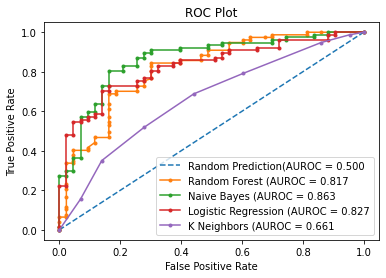

In [117]:
plt.plot(r_fpr, r_tpr, linestyle = '--' , label = 'Random Prediction(AUROC = %0.3f' % r_auc)
plt.plot(rf_fpr,rf_tpr,  marker = '.', label = 'Random Forest (AUROC = %0.3f' % rf_auc) #plot ROC curve
plt.plot(nb_fpr,nb_tpr,  marker = '.', label = 'Naive Bayes (AUROC = %0.3f' % nb_auc)
plt.plot(logreg_fpr,logreg_tpr,  marker = '.', label = 'Logistic Regression (AUROC = %0.3f' % logreg_auc)
plt.plot(knn_clf_fpr,knn_clf_tpr,  marker = '.', label = 'K Neighbors (AUROC = %0.3f' % knn_clf_auc)



#Title
plt.title('ROC Plot')
#Axis labels


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate' )
#plt.setp(ax.get_xticklabels(), color="red")


#show legend
plt.legend()

plt.show()


In [ ]:
#Title
plt.title('ROC Plot')
#Axis labels
#fig = plt.figure()
ax = fig.add_subplot(111)

#ax.plot(range(10))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.spines['bottom'].set_color('red')
ax.spines['top'].set_color('red')
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 #show legend
plt.legend()
 

plt.show()

In [67]:
rev = "wish i could say something good but i can't because its too bad"
print(logreg.predict(vectorizer.transform([rev]))[0])
print(rf.predict(vectorizer.transform([rev]))[0])
print(nb.predict(vectorizer.transform([rev]))[0])
print(knn_clf.predict(vectorizer.transform([rev]))[0])

1
1
0
1


In [68]:
rev = "This should be more understandable to the students"
print(logreg.predict(vectorizer.transform([rev]))[0])
print(rf.predict(vectorizer.transform([rev]))[0])
print(nb.predict(vectorizer.transform([rev]))[0])
print(knn_clf.predict(vectorizer.transform([rev]))[0])

0
0
0
1
